## Using SOFIE with RDataFrame in Python

In [1]:
import ROOT

Welcome to JupyROOT 6.27/01


In [2]:
modelFile = "Higgs_trained_model.h5"
if (ROOT.gSystem.AccessPathName(modelFile)) :
    ROOT.Info("TMVA_SOFIE_RDataFrame","You need to run TMVA_Higgs_Classification.C to generate the Keras trained model")
    exit()


### Parse input file (directly from Keras)

Parse the input file using the direct Keras to RModel converter

In [3]:
# parse the input Keras model into RModel object
model = ROOT.TMVA.Experimental.SOFIE.PyKeras.Parse(modelFile)

Keras Version: 2.8.0
Model has not a defined batch size, assume is 1 - input shape : { 1 , 7 }


In [4]:
#Generating inference code
model.Generate()
model.OutputGenerated()
model.PrintGenerated()

//Code generated automatically by TMVA for Inference of Model file [Higgs_trained_model.h5] at [Mon Apr  4 10:31:01 2022] 
#include<algorithm>
#include<cmath>
#include<vector>
#include "TMVA/SOFIE_common.hxx"
#include <fstream>

namespace TMVA_SOFIE_Higgs_trained_model{
namespace BLAS{
	extern "C" void sgemv_(const char * trans, const int * m, const int * n, const float * alpha, const float * A,
	                       const int * lda, const float * X, const int * incx, const float * beta, const float * Y, const int * incy);
	extern "C" void sgemm_(const char * transa, const char * transb, const int * m, const int * n, const int * k,
	                       const float * alpha, const float * A, const int * lda, const float * B, const int * ldb,
	                       const float * beta, float * C, const int * ldc);
}//BLAS
struct Session {
std::vector<float> fTensor_dense4bias0 = std::vector<float>(2);
float * tensor_dense4bias0 = fTensor_dense4bias0.data();
std::vector<float> fTensor

### Compile generated model using ROOT JIT

In [5]:
# now compile using ROOT JIT trained model
print("compiling SOFIE model and functor....")
generatedFile = "Higgs_trained_model.hxx"
modelName = "Higgs_trained_model"
ROOT.gInterpreter.Declare('#include "' + generatedFile + '"')
ROOT.gInterpreter.Declare('auto sofie_functor = TMVA::Experimental::SofieFunctor<7,TMVA_SOFIE_'+modelName+'::Session>(0);')


compiling SOFIE model and functor....


True

### Use model with RDataFrame

In [6]:
inputFile = "http://root.cern.ch/files/Higgs_data.root"

In [7]:
df1 = ROOT.RDataFrame("sig_tree", inputFile)
h1 = df1.Define("DNN_Value", "sofie_functor(rdfslot_,m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb)").Histo1D(("h_sig", "", 100, 0, 1),"DNN_Value")

df2 = ROOT.RDataFrame("bkg_tree", inputFile)
h2 = df2.Define("DNN_Value", "sofie_functor(rdfslot_,m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb)").Histo1D(("h_bkg", "", 100, 0, 1),"DNN_Value")

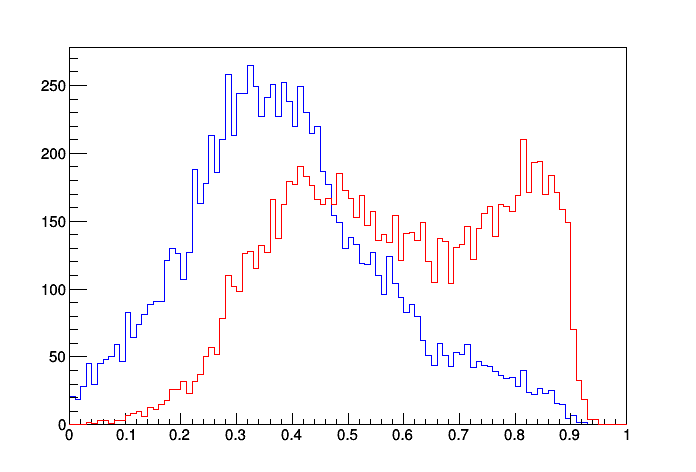

In [8]:
h1.SetLineColor(ROOT.kRed)
h2.SetLineColor(ROOT.kBlue)

c1 = ROOT.TCanvas()
ROOT.gStyle.SetOptStat(0)

h2.Draw()
h1.Draw("SAME")
c1.Draw()